In [21]:
import keras 
import numpy as np
import matplotlib.pyplot as plt 


In [22]:
from keras.models import Sequential
from keras.datasets import mnist
from keras.layers import Dense,Dropout,Flatten,Activation,Conv2D,MaxPooling2D

In [23]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [24]:
print(X_train.shape)

(60000, 28, 28)


3


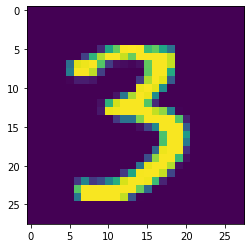

In [25]:
plt.imshow(X_train[10000,:,:])
print(Y_train[10000])

In [26]:
X_test=X_test.reshape(10000,28,28,1)
X_train=X_train.reshape(60000,28,28,1)
X_test=X_test/255
X_train=X_train/255

In [27]:
Y_train=keras.utils.to_categorical(Y_train,10)
Y_test=keras.utils.to_categorical(Y_test,10)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


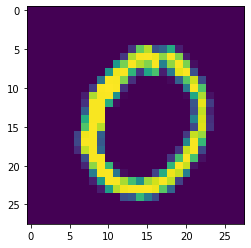

In [28]:
plt.imshow(X_test[101,:,:,0])
print(Y_test[101,:])

In [29]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(200))
model.add(Activation("relu"))
model.add(Dense(200))
model.add(Activation("relu"))

model.add(Dense(10,activation="softmax"))


In [30]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_7 (Activation)    (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_8 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
activation_9 (Activation)    (None, 10, 10, 64)        0         
__________

In [31]:
adam= keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08)
model.compile(loss="categorical_crossentropy",optimizer=adam,metrics=["accuracy"])


In [32]:
model.fit(X_train,Y_train,batch_size=100,epochs=1,verbose=1,validation_data=[X_test,Y_test])

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 57s 958us/step - loss: 0.1659 - acc: 0.9482 - val_loss: 0.0862 - val_acc: 0.9699673 - a


The predict value: [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
The Label: [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


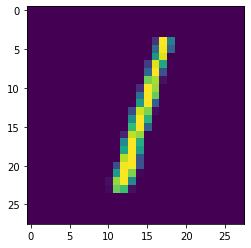

In [33]:
testest=2
plt.imshow(X_test[testest,:,:,0])

output=model.predict(X_test[testest,:,:,:].reshape(1,28,28,1))
print("The predict value:",np.round(output))
print("The Label:",Y_test[testest])

In [34]:
model.save("model/zjcFirstAlex.h5")

In [35]:
from keras.models import load_model
model =load_model("model/zjcFirstAlex.h5")

In [36]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
vgg=keras.applications.vgg16.VGG16(weights="imagenet",include_top=False,input_shape=[240,240,3])